In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# import the original dataset

df=pd.read_csv("salary.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


In [4]:
df.isnull()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5887,False,False,False,False,False,False,False,False,False,False,False
5888,False,False,False,False,False,False,False,False,False,False,False
5889,False,False,False,False,False,False,False,False,False,False,False
5890,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector',
       'Revenue'],
      dtype='object')

In [6]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [7]:
# removing comany name faeture as it is not impactful in prediction of salary
import pandas as pd

df=pd.read_csv("salary.csv")

columns_to_remove = ['Company Name']
df = df.drop(columns=columns_to_remove)

df.to_csv('modified_salary.csv', index=False)

print("Columns removed and dataset saved successfully.")


Columns removed and dataset saved successfully.


In [8]:
# removing missing values with value -1

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("modified_salary.csv")


# Replace '-1' with NaN and drop rows with missing values
df.replace('-1', np.nan, inplace=True)
df.dropna(inplace=True)

df.to_csv('modified_salary.csv', index=False)

print(f"Cleaned dataset shape: {df.shape}")
print("Columns removed and dataset saved successfully.")



Cleaned dataset shape: (4282, 10)
Columns removed and dataset saved successfully.


In [9]:

#Convert salary ranges and employee size ranges into numerical midpoints for consistent analysis


import pandas as pd
import numpy as np

df = pd.read_csv("modified_salary.csv")

# Function to clean and convert Salary Estimate
def clean_salary(salary):
    if pd.isnull(salary):
        return np.nan
    salary = salary.replace('$', '').replace('K', '').replace('(Glassdoor est.)', '').strip()
    if '-' in salary:
        salary_range = salary.split('-')
        try:
            return np.mean([float(s) * 1000 for s in salary_range])  # Convert to integers
        except ValueError:
            return np.nan
    return np.nan

# Function to clean and convert Size to numeric values (midpoint)
def clean_size(size):
    if pd.isnull(size):
        return np.nan
    size = size.replace('employees', '').strip()
    if 'to' in size:
        size_range = size.split('to')
        try:
            return np.mean([float(s.strip()) for s in size_range])  # Handle spaces in ranges
        except ValueError:
            return np.nan
    elif '10000+' in size:
        return 10000  # Replace with a fixed large number
    return np.nan



# Function to clean and convert Revenue column
def clean_revenue(revenue):
    if pd.isnull(revenue):
        return np.nan

    # Remove '(USD)', '$', and 'Less than' to have a pure numerical
    revenue = revenue.replace('(USD)', '').replace('$', '').replace('Less than', '').strip()
    
    # Handle ranges with 'to'
    if 'to' in revenue:
        revenue_range = revenue.split('to')
        try:
            min_val = convert_to_numeric(revenue_range[0].strip())
            max_val = convert_to_numeric(revenue_range[1].strip())
            return np.mean([min_val, max_val])
        except ValueError:
            return np.nan
    
    # Handle '$10+ billion'
    if '+' in revenue:
        revenue = revenue.replace('+', '')
    
    # Convert single values like '1 million' or '10 billion'
    return convert_to_numeric(revenue)

# function to convert 'million' and 'billion' to numerical values
def convert_to_numeric(value):
    if 'million' in value:
        return float(value.replace('million', '').strip()) * 1e6
    elif 'billion' in value:
        return float(value.replace('billion', '').strip()) * 1e9
    try:
        return float(value)
    except ValueError:
        return np.nan

# Apply transformations for revised values for features
df['Salary Estimate'] = df['Salary Estimate'].apply(clean_salary)
df['Size'] = df['Size'].apply(clean_size)
df['Revenue'] = df['Revenue'].apply(clean_revenue)

# Drop rows with missing Salary , Size and revenue after conversion
df.dropna(subset=['Salary Estimate', 'Size','Revenue'], inplace=True)

df.to_csv('cleaned_modified_salary_data.csv', index=False)

print(df.head())



                          Job Title  Salary Estimate  Rating      Location  \
9   Data Scientist/Machine Learning         146000.0     4.4  New York, NY   
10    Data Scientist, Acorn AI Labs         146000.0     4.3  New York, NY   
14        Data Scientist, Analytics         146000.0     3.6  Brooklyn, NY   
15       Data Scientist/ML Engineer         146000.0     3.3  New York, NY   
16                   Data Scientist         146000.0     3.6  New York, NY   

      Size  Founded  Type of ownership  \
9    125.5     2011  Company - Private   
10  3000.5     1999   Company - Public   
14   750.5     2005   Company - Public   
15  3000.5     1943  Company - Private   
16   750.5     2005   Company - Public   

                                   Industry                  Sector  \
9                                  Internet  Information Technology   
10  Enterprise Software & Network Solutions  Information Technology   
14                      Other Retail Stores                  Reta

In [10]:

# preprocessing

#to lable encoding and normalization at the same time 


df=pd.read_csv("cleaned_modified_salary_data.csv")

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import pandas as pd


# Numerical to normalize
numerical_cols = ['Rating','Size','Salary Estimate', 'Founded','Revenue']

# Categorical to label encode
categorical_cols = ['Job Title', 'Location',
         'Type of ownership', 'Industry', 'Sector']


# Create transformers for numerical and label encoding
numerical_transformer = MinMaxScaler()

# Define a custom transformer for label encoding
def label_encode(df):
    le = LabelEncoder()
    for col in categorical_cols :
        df[col] = le.fit_transform(df[col])
    return df

# Combine transformers
preprocessor = make_column_transformer(
    (numerical_transformer, numerical_cols),
    (FunctionTransformer(label_encode, validate=False), categorical_cols)
)

# Fit and transform the data using the preprocessor
X_transformed = preprocessor.fit_transform(df)

# Get the feature names after label encoding
transformed_columns = numerical_cols + categorical_cols 

df_transformed = pd.DataFrame(X_transformed, columns=transformed_columns)
df_transformed.to_csv('preprocessed_salary_data.csv', index=False)

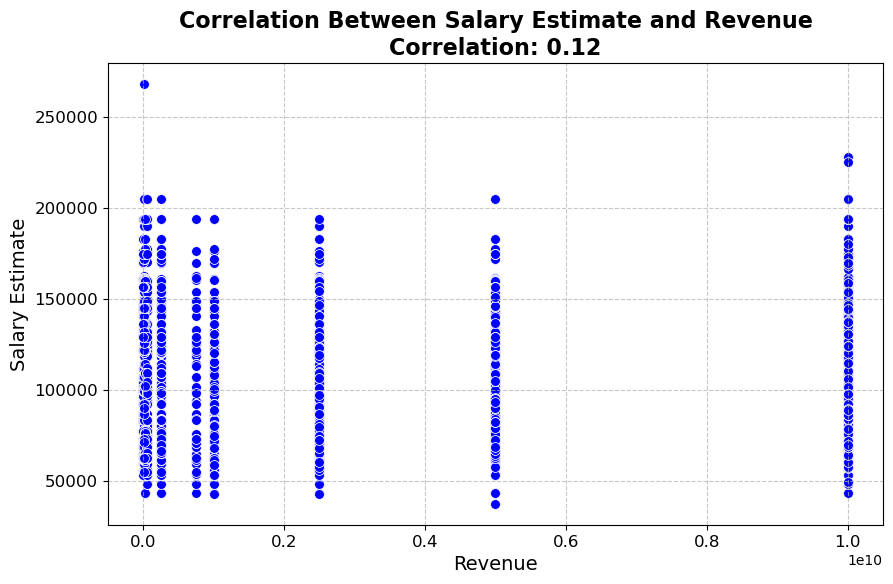

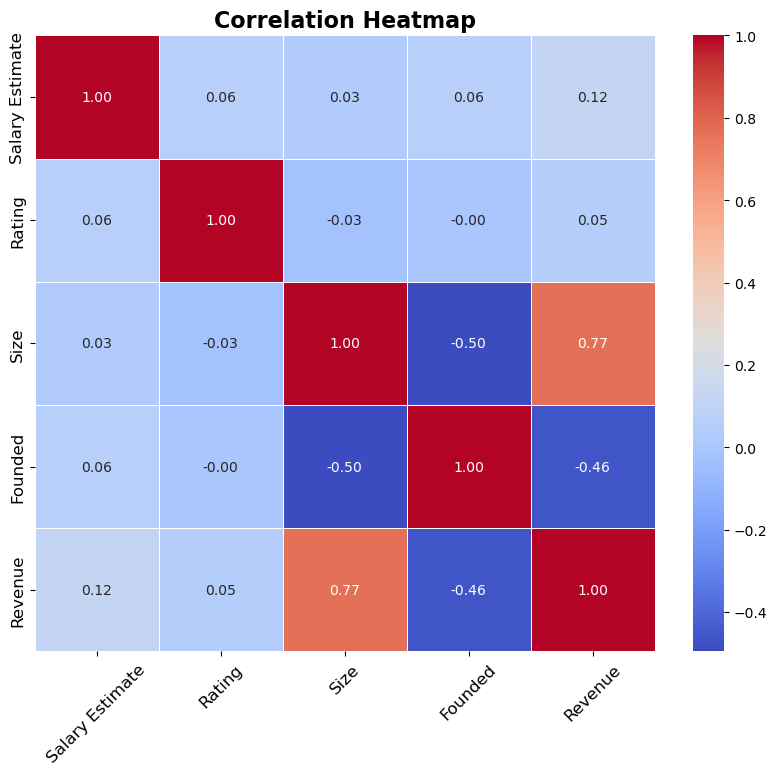

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_modified_salary_data.csv")

# Ensure numerical data for both features
df['Salary Estimate'] = pd.to_numeric(df['Salary Estimate'], errors='coerce')
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

# Drop rows with missing values in these columns
df = df.dropna(subset=['Salary Estimate', 'Revenue'])

# Calculate correlation coefficient
correlation = df['Salary Estimate'].corr(df['Revenue'])

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenue', y='Salary Estimate', data=df, color='blue', s=50)
plt.title(f'Correlation Between Salary Estimate and Revenue\nCorrelation: {correlation:.2f}', 
          fontsize=16, fontweight='bold')
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Salary Estimate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

#Display heatmap of correlations among all numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()
